In [1]:
%matplotlib inline 
%matplotlib notebook
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [2]:
#loading File 
grad_data = "Brett_Resources/grad_rates.csv"

In [3]:
#Reading the files 
grad_rates = pd.read_csv(grad_data)

grad_rates


,STNAM,FIPST,LEAID,LEANM,ncessch,SCHNAM,ALL_COHORT,ALL_RATE,MAM_COHORT,MAM_RATE,...,MTR_RATE,MWH_COHORT,MWH_RATE,CWD_COHORT,CWD_RATE,ECD_COHORT,ECD_RATE,LEP_COHORT,LEP_RATE,YEAR
0,ALABAMA,1,100005,Albertville City,1.000050e+10,Albertville High Sch,252.0,91.0,NaN,NaN,...,NaN,178.0,92.0,13.0,NaN,95.0,77.0,9.0,50.0,2015
1,ALABAMA,1,100006,Marshall County,1.000060e+10,Asbury Sch,63.0,95.0,1.0,NaN,...,NaN,50.0,90.0,12.0,50.0,49.0,90.0,2.0,NaN,2015
2,ALABAMA,1,100006,Marshall County,1.000060e+10,Douglas High Sch,114.0,87.0,1.0,NaN,...,NaN,85.0,82.0,12.0,50.0,76.0,82.0,2.0,NaN,2015
3,ALABAMA,1,100006,Marshall County,1.000060e+10,Kate D Smith DAR High Sch,102.0,92.0,NaN,NaN,...,NaN,98.0,92.0,13.0,50.0,41.0,84.5,NaN,NaN,2015
4,ALABAMA,1,100006,Marshall County,1.000060e+10,Brindlee Mt High Sch,90.0,87.0,NaN,NaN,...,NaN,88.0,87.0,15.0,50.0,59.0,84.5,NaN,NaN,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109203,WYOMING,56,5605820,Washakie County School District #2,5.605820e+11,Ten Sleep K-12,5.0,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,2011
109204,WYOMING,56,5605830,Teton County School District #1,5.605830e+11,Jackson Hole High School,154.0,92.0,2.0,NaN,...,NaN,115.0,92.0,9.0,50.0,4.0,NaN,18.0,69.5,2011
109205,WYOMING,56,5605830,Teton County School District #1,5.605830e+11,Summit High School,20.0,69.5,1.0,NaN,...,NaN,12.0,50.0,3.0,NaN,10.0,50.0,4.0,NaN,2011
109206,WYOMING,56,5606090,Weston County School District #7,5.606090e+11,Upton High School,22.0,80.0,NaN,NaN,...,NaN,21.0,80.0,4.0,NaN,7.0,50.0,NaN,NaN,2011


In [4]:
overall_rates = pd.DataFrame({"States" : grad_rates["STNAM"],
                              "County" : grad_rates["LEANM"], 
                              "School Name" : grad_rates["SCHNAM"], 
                              "Graduation Rate" : grad_rates["ALL_RATE"]})

state_grouped = overall_rates.groupby("States").mean()["Graduation Rate"] 
state_grouped


States
ALABAMA                     82.491036
ALASKA                      61.446009
ARIZONA                     66.039331
ARKANSAS                    83.026671
BUREAU OF INDIAN AFFAIRS    57.895833
CALIFORNIA                  81.746088
COLORADO                    69.185665
CONNECTICUT                 86.286093
DELAWARE                    80.855615
DISTRICT OF COLUMBIA        65.822485
FLORIDA                     72.243028
GEORGIA                     72.986905
HAWAII                      76.124561
IDAHO                       70.812339
ILLINOIS                    82.738425
INDIANA                     85.277313
IOWA                        85.564489
KANSAS                      80.169575
KENTUCKY                    84.804375
LOUISIANA                   76.195880
MAINE                       82.522727
MARYLAND                    81.440359
MASSACHUSETTS               82.380282
MICHIGAN                    75.370014
MINNESOTA                   72.028577
MISSISSIPPI                 76.837925
MISSO

In [5]:
state_grouped = state_grouped.drop(['WYOMING', 'WISCONSIN','WEST VIRGINIA', 'WASHINGTON', 'VIRGINIA', 'VERMONT', 'UTAH', 'TEXAS', 'TENNESSEE', 'SOUTH DAKOTA', 'SOUTH CAROLINA', 'RHODE ISLAND', 'PENNSYLVANIA', 'OREGON', 'OKLAHOMA', 'OHIO', 'NORTH DAKOTA', 'NORTH CAROLINA', 'NEW MEXICO', 'NEW JERSEY', 'NEW HAMPSHIRE', 'NEVADA', 'NEBRASKA', 'MONTANA', 'MISSOURI', 'MISSISSIPPI', 'MINNESOTA', 'MICHIGAN', 'MASSACHUSETTS', 'MARYLAND', 'MAINE', 'LOUISIANA', 'KENTUCKY','KANSAS', 'IOWA', 'INDIANA', 'IDAHO','HAWAII', 'FLORIDA','DISTRICT OF COLUMBIA','DELAWARE', 'CONNECTICUT', 'COLORADO', 'BUREAU OF INDIAN AFFAIRS','ARKANSAS', 'ARIZONA','ALASKA', 'ALABAMA'])
state_grouped

States
CALIFORNIA    81.746088
GEORGIA       72.986905
ILLINOIS      82.738425
NEW YORK      77.612140
Name: Graduation Rate, dtype: float64

In [9]:
x_axis = np.arange(len(state_grouped))
tick_locations = [value for value in x_axis]

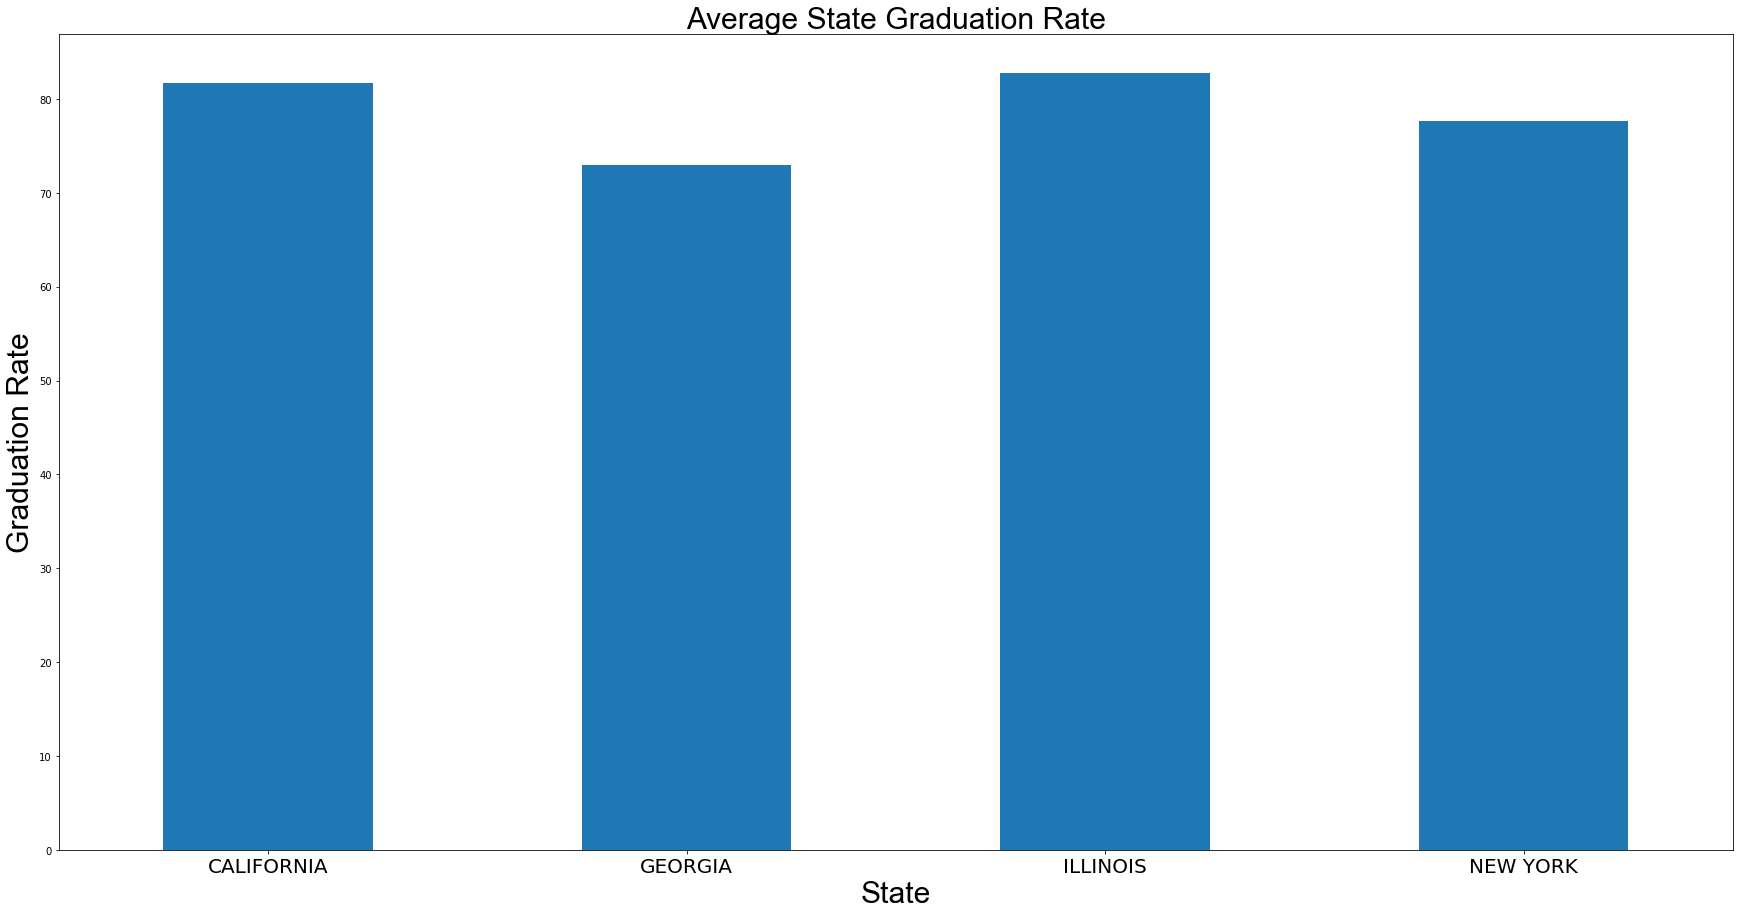

In [10]:
# Bar Chart 
plt.figure(figsize=(30,15))
grad_rate_chart = state_grouped.plot(kind='bar')
plt.title("Average State Graduation Rate", fontname="Arial", fontsize=30)
plt.xticks(tick_locations, rotation="0", fontsize=20)
plt.xlabel("State", fontname="Arial", fontsize=30)
plt.ylabel("Graduation Rate", fontname="Arial", fontsize=30)
plt.show()